# _Ames housing_

---

Predição do preço de vendas de casas em Ames, Iowa - EUA.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

from scipy.stats import pearsonr

data_dir = Path('../data').resolve()

df = pd.read_csv(data_dir/'train.csv', index_col='Id')

/home/bruno/miniconda3/envs/ames/lib/python3.10/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


# Os dados

- O conjunto original possui dados de diversas características de casas vendidas na cidade de Ames de 2006 a 2010, junto com o valor da transação

- O conjunto original possui dados de 1460 transações

- Nós consideramos somente as transações classificadas como "normais" e em zonas residenciais de baixa densidade, somando **955 observações**

In [2]:
df = df[df['MSZoning'] == 'RL']
df = df[df['SaleCondition'] == 'Normal']

Nós levantamos hipóteses sobre variáveis que possuem uma relação com o valor de venda (`SalePrice`), ou seja

$$
\texttt{SalePrice} \approx \texttt{LotArea} + \texttt{OverallQual} + \texttt{YearBuilt} + \texttt{TotRmsAbvGrd} + \texttt{GarageCars}
$$

onde

- `LotArea`: Tamanho do terreno do imóvel
- `OverallQual`: Avalia o estado dos materiais e acabamento em uma escala de 1 a 10
- `YearBuilt`: Ano em que o imóvel foi construído
- `TotRmsAbvGrd`: Número de cômodos presentes na área construída, sem contar banheiros
- `GarageCars`: Quantidade de carros que cabem na garagem

# Variável resposta

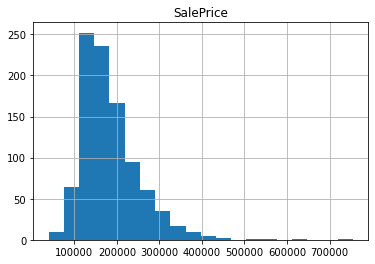

In [3]:
ax = df['SalePrice'].hist(bins=20)
ax.set_title('SalePrice')

plt.show()

Corrigido o comportamento "log-normal" da variável resposta.

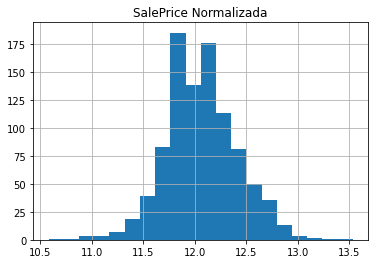

In [4]:
df['SalePrice'] = df['SalePrice'].apply(np.log)

ax = df['SalePrice'].hist(bins=20)
ax.set_title('SalePrice Normalizada')

plt.show()

# Variáveis explicativas

In [5]:
# input variables
input_variables = ['LotArea', 'OverallQual', 'YearBuilt', 'TotRmsAbvGrd', 'GarageCars']
df = df[input_variables + ['SalePrice', ]]

In [6]:
df.head()

,LotArea,OverallQual,YearBuilt,TotRmsAbvGrd,GarageCars,SalePrice
Id,,,,,,
1,8450,7,2003,8,2,12.247694
2,9600,6,1976,6,2,12.109011
3,11250,7,2001,6,2,12.317167
5,14260,8,2000,9,3,12.429216
6,14115,5,1993,5,2,11.870600


## `LotArea`

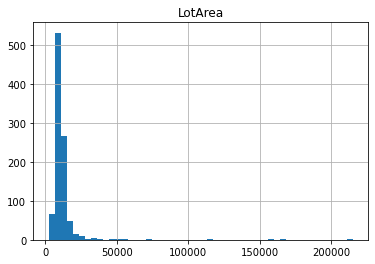

In [7]:
ax = df['LotArea'].hist(bins=50)

ax.set_title('LotArea')
plt.show()

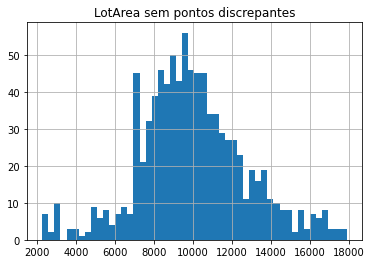

In [8]:
df_ = df[df['LotArea'] <= df['LotArea'].quantile(0.95)]

ax = df_['LotArea'].hist(bins=50)
ax.set_title('LotArea sem pontos discrepantes')

plt.show()

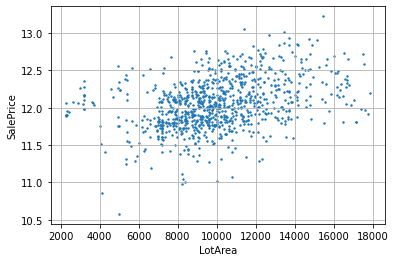

In [9]:
plt.scatter(df_['LotArea'], df_['SalePrice'], s=2)

plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.grid()
plt.show()

Descartamos essa variável por falta de indícios.

## `OverallQual`

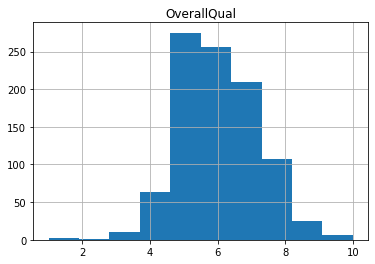

In [10]:
ax = df['OverallQual'].hist(bins=10)
ax.set_title('OverallQual')

plt.show()

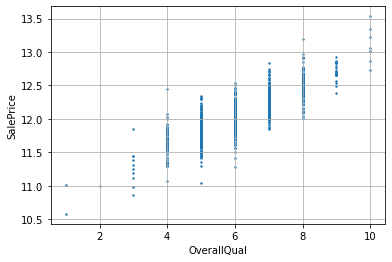

In [11]:
plt.scatter(df['OverallQual'], df['SalePrice'], s=2)

plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.grid()
plt.show()

In [12]:
r, p = pearsonr(df['OverallQual'].values, df['SalePrice'].values)

print(f"Correlação de {r:.4f} com p = {p:.4f}")

Correlação de 0.8353 com p = 0.0000


## `YearBuilt`

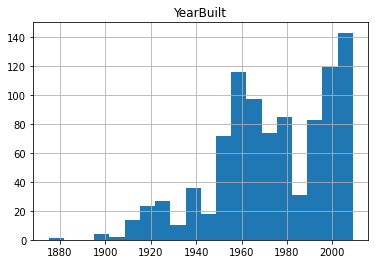

In [13]:
ax = df['YearBuilt'].hist(bins=20)
ax.set_title('YearBuilt')

plt.show()

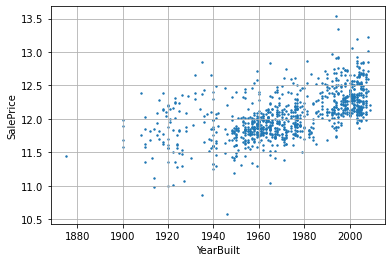

In [14]:
plt.scatter(df['YearBuilt'], df['SalePrice'], s=2)

plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.grid()
plt.show()

In [15]:
r, p = pearsonr(df['YearBuilt'].values, df['SalePrice'].values)

print(f"Correlação de {r:.4f} com p = {p:.4f}")

Correlação de 0.5760 com p = 0.0000


## `TotRmsAbvGrd`

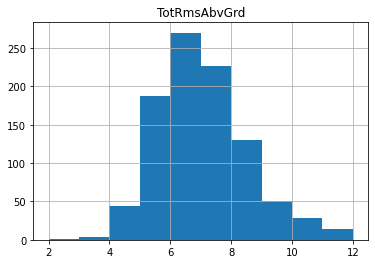

In [16]:
ax = df['TotRmsAbvGrd'].hist(bins=10)
ax.set_title('TotRmsAbvGrd')

plt.show()

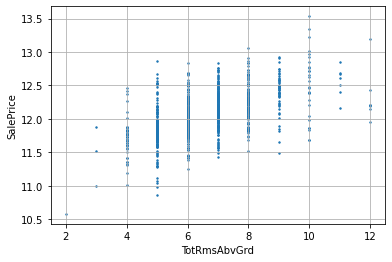

In [17]:
plt.scatter(df['TotRmsAbvGrd'], df['SalePrice'], s=2)

plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.grid()
plt.show()

In [18]:
r, p = pearsonr(df['TotRmsAbvGrd'].values, df['SalePrice'].values)

print(f"Correlação de {r:.4f} com p = {p:.4f}")

Correlação de 0.5584 com p = 0.0000


## `GarageCars`

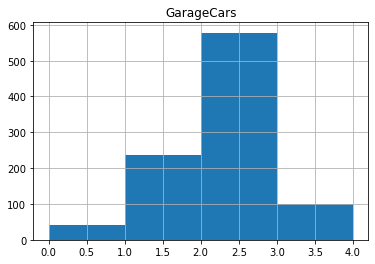

In [19]:
ax = df['GarageCars'].hist(bins=4)
ax.set_title('GarageCars')

plt.show()

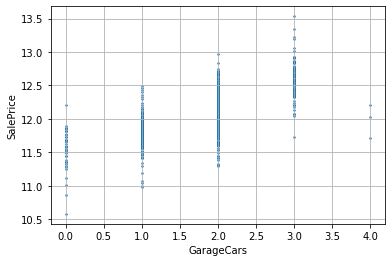

In [20]:
plt.scatter(df['GarageCars'], df['SalePrice'], s=2)

plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.grid()
plt.show()

In [21]:
r, p = pearsonr(df['GarageCars'].values, df['SalePrice'].values)

print(f"Correlação de {r:.4f} com p = {p:.4f}")

Correlação de 0.6684 com p = 0.0000


# Regressão linear múltipla

$$
\texttt{SalePrice} \approx \texttt{OverallQual} + \texttt{YearBuilt} + \texttt{TotRmsAbvGrd} + \texttt{GarageCars}
$$

In [22]:
input_variables = ['OverallQual', 'YearBuilt', 'TotRmsAbvGrd', 'GarageCars']
df = df[input_variables + ['SalePrice', ]]

alpha = .05

In [47]:
Y = df['SalePrice']
X = sm.add_constant(df[input_variables])

model = sm.OLS(Y, X)
results = model.fit()



results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     868.5
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          1.72e-315
Time:                        14:34:07   Log-Likelihood:                 386.56
No. Observations:                 955   AIC:                            -763.1
Df Residuals:                     950   BIC:                            -738.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.7358      0.537     16.275      0.000       7.682       9.789
OverallQual      0.1512      0.006     26.287      0.000       0.140       0.162
YearBuilt        0.0010      0.000      3.390      0.001       0.000       0.001
TotRmsAbvGrd     0.0521      0.004     13.155      0.000       0.044       0.060
GarageCars       0.1073      0.010     10.618      0.000       0.087       0.127
==============================================================================
Omnibus:                       32.765   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.998
Skew:                           0.245   Prob(JB):                     1.54e-13
Kurtosis:                       4.115   Cond. No.                     2.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$$
\log \texttt{SalePrice} \approx 8.7358 + 0.1512 *\texttt{OverallQual} + 0.0010 *\texttt{YearBuilt} + 0.0521 *\texttt{TotRmsAbvGrd} + 0.1073 *\texttt{GarageCars}
$$

In [24]:
print(f"F = {results.fvalue:.2f} com p = {results.f_pvalue:.2f}")

F = 868.47 com p = 0.00


Negamos a hipótese de que o modelo não tem utilidade.

In [25]:
results.pvalues

const            1.014317e-52
OverallQual     6.895580e-115
YearBuilt        7.277522e-04
TotRmsAbvGrd     1.983410e-36
GarageCars       5.789907e-25
dtype: float64

Negamos a hipótese nula para todos os coeficientes.

## Análise dos resíduos

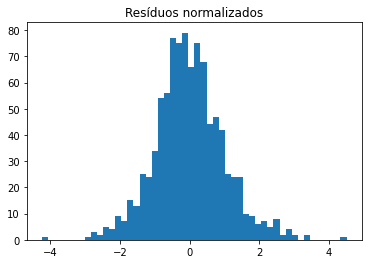

In [26]:
plt.hist(results.resid_pearson, bins=50)
plt.title('Resíduos normalizados')
plt.show()

In [27]:
oor_fraction = np.sum(np.abs(results.resid_pearson) > 3) / results.nobs
print(f"{100*oor_fraction:.2f}% dos resíduos estão fora do intervalo [-3,3].")

0.52% dos resíduos estão fora do intervalo [-3,3].


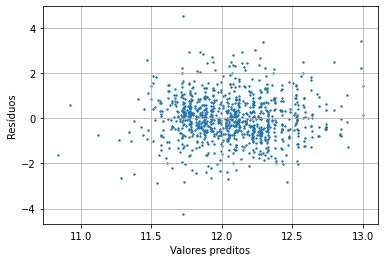

In [28]:
plt.scatter(results.fittedvalues, results.resid_pearson, s=2)

plt.grid()
plt.xlabel('Valores preditos')
plt.ylabel('Resíduos')
plt.show()

In [29]:
print((results.resid > 0).sum())
print((results.resid < 0).sum())

456
499


# Conclusão

- Apesar do desempenho aquém em relação ao encontrado na literatura, o modelo é útil e significativo

In [48]:
error = np.abs(np.exp(df['SalePrice']) - np.exp(results.fittedvalues))

print(
    f"MAPE = \t{100*(np.abs(error) / np.exp(df['SalePrice'])).mean():.3f}%"
    f"\nMAE  = \t{error.mean():.4f}"
    f"\nMSE  = \t{np.square(error).mean():.4f}"
    f"\nRMSE = \t{np.sqrt(np.square(error).mean()):.4f}"
)

MAPE = 	12.335%
MAE  = 	23007.6291
MSE  = 	1138121550.1957
RMSE = 	33736.0571


- Próximos passos:
 - Explorar outras variáveis
 - Explorar transformações das variáveis

# Muito Obrigado!

Grupo:

- Bruno Machado Pacheco
- Gabriel Ferrazzo
- Gustavo de Assis Schmidt
- Mateus Moro Torres